# Câncer de pele

## Importar bibliotecas

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import os
from sklearn.decomposition import PCA
from skimage import color, img_as_float
from skimage import exposure
from skimage import filters
from skimage import measure

### Testando pra ver se vai mesmo

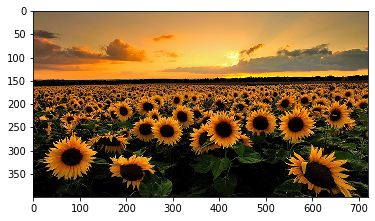

In [2]:
img=mpimg.imread('girassol.jpg')
imgplot = plt.imshow(img)

In [3]:
data = img / 255

In [4]:
data = data.reshape(400 * 720, 3)
data.shape

(288000, 3)

In [5]:
kmeans = KMeans(4)
kmeans.fit(data)
labels = kmeans.predict(data)

In [6]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
recolored = new_colors.reshape(img.shape)
recolored.shape

(400, 720, 3)

[]

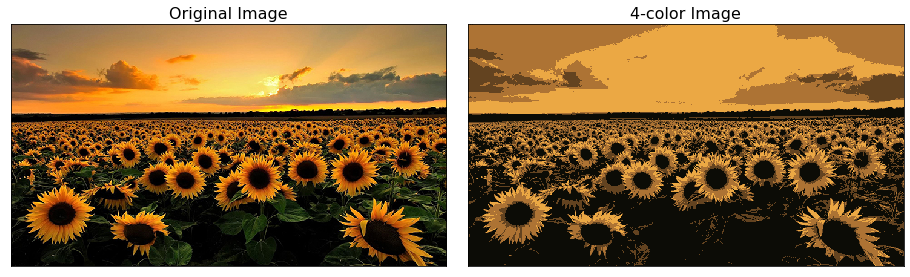

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored)
ax[1].set_title('4-color Image', size=16);

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
#plt.imsave('girassol_4.png', recolored)

### Foi ? Vamos lá então

In [ ]:
recolored_list=[]
path = 'data/train/benign'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1], scaled.shape[2])
    kmeans = KMeans(4)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    recolored = new_colors.reshape(data.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]*scaled.shape[2]))
train_b = pd.DataFrame(recolored_list)

In [ ]:
recolored_list=[]
path = 'data/train/malignant'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1], scaled.shape[2])
    kmeans = KMeans(4)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    recolored = new_colors.reshape(data.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]*scaled.shape[2]))
train_m = pd.DataFrame(recolored_list)

### Plotando as imagens...

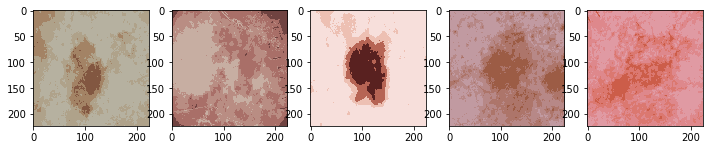

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_m.loc[i,:].values.reshape(224,224,3))

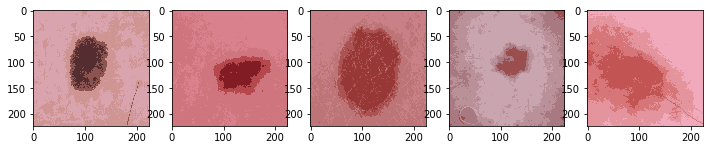

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_b.loc[i,:].values.reshape(224,224,3))

In [12]:
df = train_b.append(train_m, ignore_index=True)

### Armazenando dados...

In [6]:
df.to_csv('data_train.csv.gzip')

## Ler os dados...

In [4]:
df = pd.read_csv('dataset.zip', compression='zip')

In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.854914,0.646175,0.685439,0.854914,0.646175,0.685439,0.854914,0.646175,0.685439,0.854914,...,0.577641,0.810273,0.588075,0.577641,0.810273,0.588075,0.577641,0.810273,0.588075,0.577641
1,0.813274,0.460594,0.493546,0.813274,0.460594,0.493546,0.813274,0.460594,0.493546,0.857540,...,0.493546,0.813274,0.460594,0.493546,0.813274,0.460594,0.493546,0.813274,0.460594,0.493546
2,0.794758,0.502321,0.532259,0.794758,0.502321,0.532259,0.794758,0.502321,0.532259,0.794758,...,0.465040,0.743186,0.455635,0.465040,0.743186,0.455635,0.465040,0.743186,0.455635,0.465040
3,0.664007,0.478107,0.510704,0.664007,0.478107,0.510704,0.664007,0.478107,0.510704,0.664007,...,0.307887,0.605700,0.313405,0.307887,0.605700,0.313405,0.307887,0.605700,0.313405,0.307887
4,0.942543,0.669920,0.733960,0.942543,0.669920,0.733960,0.942543,0.669920,0.733960,0.942543,...,0.733960,0.942543,0.669920,0.733960,0.942543,0.669920,0.733960,0.942543,0.669920,0.733960


## PCA ?

In [19]:
pca = PCA(n_components=2)
pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df), columns= ['pc1', 'pc2']).reset_index()
dfp['label'] = 0

In [20]:
for item in range(0, 200):
    if dfp['index'][item] < 100:
        dfp['label'][item] = 'pc1'
    else:
        dfp['label'][item] = 'pc2'
labels = ['pc1', 'pc2']
colors = ['blue', 'k']

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yukar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

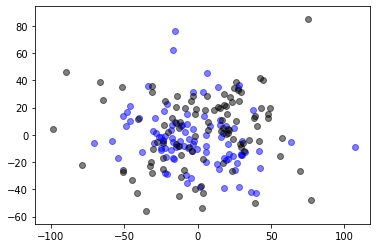

In [21]:
for label, color in zip(labels,colors):
    indices = dfp['label'] == label
    plt.scatter(dfp.loc[indices, 'pc1'],
                dfp.loc[indices, 'pc2'], c = color, alpha=0.5)

Misturou tudo.... E se aumentarmos os componentes ?

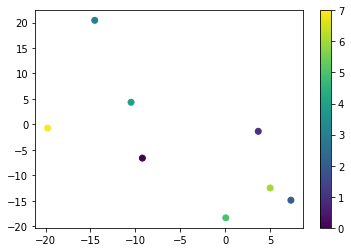

In [24]:
patients_cluster = KMeans().fit(df)

pca = PCA(n_components=100)
X = pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df)).reset_index()


dfp['labels'] = patients_cluster.labels_
plt.scatter(X[:, 0], X[:, 1],  c=dfp['labels'].unique(), cmap='viridis')
plt.colorbar()
plt.show()

### E se equalizar a imagem ?

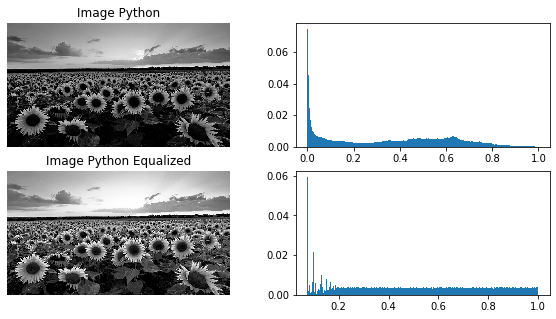

In [12]:
img=mpimg.imread('girassol.jpg')
img_gray = color.rgb2gray(img_as_float(img))
img_hist = exposure.equalize_hist(img_gray)

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
cache = [(img_gray, 'Image Python'), (img_hist, 'Image Python Equalized')]
for indice, image in zip(range(0, 2), cache):
    ax[indice, 0].imshow(image[0], cmap='gray')
    ax[indice, 0].set_title(image[1])
    ax[indice, 0].axis('off')
    weights = np.ones(image[0].ravel().shape) / float(image[0].size)
    ax[indice, 1].hist(image[0].flatten(), bins=256, weights=weights)
plt.show()

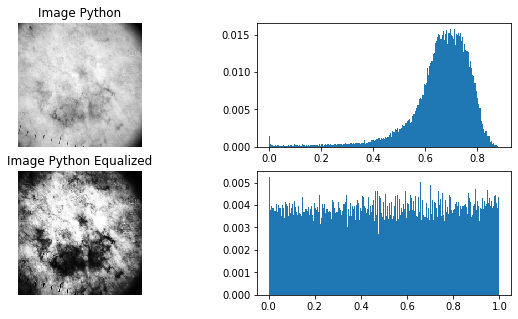

In [13]:
img=mpimg.imread('1.jpg')
img_gray = color.rgb2gray(img_as_float(img))
img_hist = exposure.equalize_hist(img_gray)

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
cache = [(img_gray, 'Image Python'), (img_hist, 'Image Python Equalized')]
for indice, image in zip(range(0, 2), cache):
    ax[indice, 0].imshow(image[0], cmap='gray')
    ax[indice, 0].set_title(image[1])
    ax[indice, 0].axis('off')
    weights = np.ones(image[0].ravel().shape) / float(image[0].size)
    ax[indice, 1].hist(image[0].flatten(), bins=256, weights=weights)
plt.show()

In [9]:
recolored_list=[]
path = 'data/train/benign'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img = mpimg.imread(f'{path}/{foto}')
    img_gray = color.rgb2gray(img_as_float(img))
    img_hist = exposure.equalize_hist(img_gray)
    scaled = img_hist / 255
    kmeans = KMeans(64)
    kmeans.fit(scaled)
    labels = kmeans.predict(scaled)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]  
    recolored = new_colors.reshape(scaled.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]))
train_b = pd.DataFrame(recolored_list)

In [10]:
recolored_list=[]
path = 'data/train/malignant'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img = mpimg.imread(f'{path}/{foto}')
    img_gray = color.rgb2gray(img_as_float(img))
    img_hist = exposure.equalize_hist(img_gray)
    scaled = img_hist / 255
    kmeans = KMeans(64)
    kmeans.fit(scaled)
    labels = kmeans.predict(scaled)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]  
    recolored = new_colors.reshape(scaled.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]))
train_m = pd.DataFrame(recolored_list)

In [26]:
df = train_b.append(train_m, ignore_index=True)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\yukar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


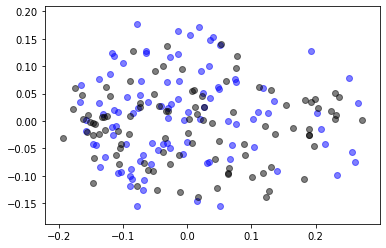

In [27]:
pca = PCA(n_components=2)
pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df), columns= ['pc1', 'pc2']).reset_index()
dfp['label'] = 0
for item in range(0, 200):
    if dfp['index'][item] < 100:
        dfp['label'][item] = 'pc1'
    else:
        dfp['label'][item] = 'pc2'
labels = ['pc1', 'pc2']
colors = ['blue', 'k']
for label, color in zip(labels,colors):
    indices = dfp['label'] == label
    plt.scatter(dfp.loc[indices, 'pc1'],
                dfp.loc[indices, 'pc2'], c = color, alpha=0.5)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\yukar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


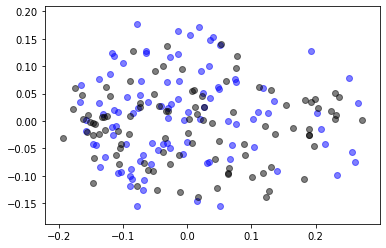

In [28]:
pca = PCA(n_components=2)
pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df), columns= ['pc1', 'pc2']).reset_index()
dfp['label'] = 0
for item in range(0, 200):
    if dfp['index'][item] < 100:
        dfp['label'][item] = 'pc1'
    else:
        dfp['label'][item] = 'pc2'
labels = ['pc1', 'pc2']
colors = ['blue', 'k']
for label, color in zip(labels,colors):
    indices = dfp['label'] == label
    plt.scatter(dfp.loc[indices, 'pc1'],
                dfp.loc[indices, 'pc2'], c = color, alpha=0.5)

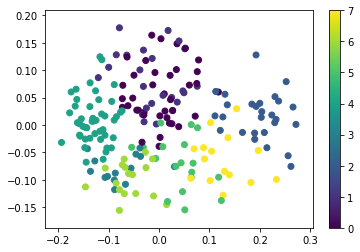

In [18]:
patients_cluster = KMeans().fit(df)

pca = PCA(n_components=2)
X = pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df)).reset_index()


dfp['labels'] = patients_cluster.labels_
plt.scatter(X[:, 0], X[:, 1],  c=dfp['labels'], cmap='viridis')
plt.colorbar()
plt.show()

In [14]:
from mpl_toolkits.mplot3d import Axes3D

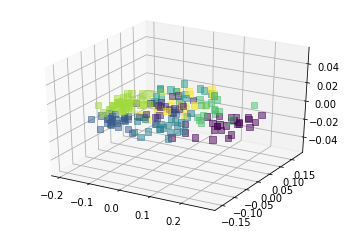

In [39]:
patients_cluster = KMeans().fit(df)

pca = PCA(n_components=3)
X = pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df)).reset_index()
dfp['labels'] = patients_cluster.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="s", s=40, c=dfp['labels'], cmap='viridis')
plt.show()

In [40]:
from yellowbrick.cluster import KElbowVisualizer

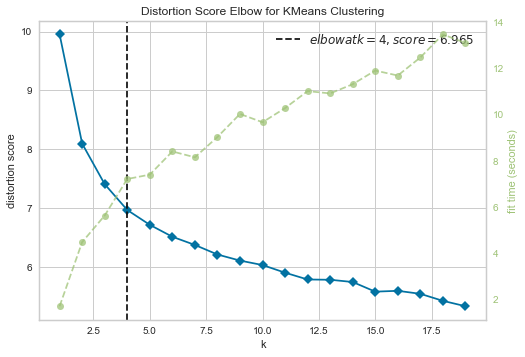

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df)
visualizer.show()

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\yukar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


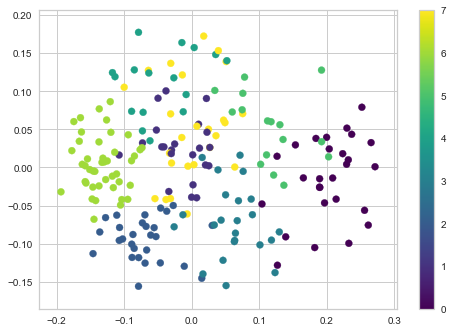

In [63]:
pca = PCA(n_components=5)
pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df)).reset_index()
dfp['label'] = 0
for item in range(0, 200):
    if dfp['index'][item] < 100:
        dfp['label'][item] = 'pc1'
    else:
        dfp['label'][item] = 'pc2'

dfp['labels'] = patients_cluster.labels_
plt.scatter(X[:, 0], X[:, 1],  c=dfp['labels'], cmap='viridis')
plt.colorbar()
plt.show()